# Lab exercise 02, Supervised learning, KNN


---



1, Load and preprocess the data
* A, Download the modified version of the *"Sleep in Mammals: Ecological and Constitutional Correlates"* dataset.  https://patbaa.web.elte.hu/Mammals.xls
* B, Check manually the excel sheet, which value marks the missing values?
* C, Load the excel sheet directly via pandas (the 'All Data' sheet). Tell pandas to track the missing values correctly!
* D, Remove columns that have more than 10 missing value!
* E, Replace each remained missing value with the mean of its column!

2, K-nearest neighbors regression
* A, Predict the lifespan of each animal with KNN regression. Use Euclidean distance, uniform weights in your model and set K to 10. Generate the predictions with leave-one-out cross-validation.
* B, Plot the predicted lifespan for each aminal vs the actual lifespan.
* C, Calculate the Pearson's correlation and the MAE (mean absolute error) between the predicted and the actual values.

3, K-nearest neighbors regression with normalization.
* A, Normalize each column of your data frame (except for the predicted variable, the lifespan) to have 0 mean, and unit variance, and repeat exercise 2. 
* B, Why is scaling of the data is important when using KNN? Write down with your own words!
* C, Investigate the predictions. Which animals die too early/live too long according to our model?
* D, Plot the MAE (mean absolute error) of the prediction as a function of K for K $\in$ {1; 5; 10; 15}


4, K-nearest neighbors regression by hand. You may use only numpy and pandas for this task.
* A, Calculate the lifespan KNN (10 neighbor, Euclidean distance, uniform weights) prediction for the Man. Use the normalized dataset. Fit the model on all the data except for the Man.
* B, How does your hand-crafted prediction matches with the prediction generated in **3,A**?


---

### Hints:

* Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
* Comments you code
* Write functions for repetitive tasks!
* Use the pandas package for data loading and handling
* Use matplotlib for plotting or bokeh and plotly for interactive investigation
* Use the scikit learn package for almost everything
* Use for loops only if it is really necessary!

# <center> Solution </center>

## 1) Preprocessing

### A) Download

In [1]:
!wget https://patbaa.web.elte.hu/Mammals.xls

--2019-09-28 19:11:40--  https://patbaa.web.elte.hu/Mammals.xls
Resolving patbaa.web.elte.hu (patbaa.web.elte.hu)... 157.181.1.225
Connecting to patbaa.web.elte.hu (patbaa.web.elte.hu)|157.181.1.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23552 (23K) [application/vnd.ms-excel]
Saving to: ‘Mammals.xls’

Mammals.xls         100%[===================>]  23.00K  --.-KB/s    in 0s      

2019-09-28 19:11:40 (109 MB/s) - ‘Mammals.xls’ saved [23552/23552]



Loading in the tools needed.

In [1]:
%pylab inline
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr

Populating the interactive namespace from numpy and matplotlib


### B) Missing values

The missing values are marked as "-999".

### C) Loading in .xls

In [2]:
data = pd.read_excel('Mammals.xls', sheet_name='All Data', na_values=-999)

In [3]:
data.head(14)

,Species,BodyW,BrainW,SWS,PS,TS,LifeSpan,GT,PI,SEI,ODI,RND
0,African elephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3,77373
1,African giant pouched rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,79575
2,Arctic Fox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1,96354
3,Arctic ground squirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3,84651
4,Asian elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,63335
5,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,10965
6,Big brown bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,24538
7,Brazilian tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,70592
8,Cat,3.300,25.6,10.9,3.6,14.5,28.0,63.0,1,2,1,98018
9,Chimpanzee,52.160,440.0,8.3,1.4,9.7,50.0,230.0,1,1,1,8110


In [4]:
data.keys()

Index(['Species', 'BodyW', 'BrainW', 'SWS', 'PS', 'TS', 'LifeSpan', 'GT', 'PI',
       'SEI', 'ODI', 'RND'],
      dtype='object')

### D) Removing colomuns

In [5]:
ifdrop = {}
for k in data.keys():
# Source: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
    ifdrop[k] = data[k].isna().sum()

for k, v in ifdrop.items():
    if v > 10:
        data.drop(k, axis = 1, inplace=True)

In [6]:
data.head(14)

,Species,BodyW,BrainW,TS,LifeSpan,GT,PI,SEI,ODI,RND
0,African elephant,6654.000,5712.0,3.3,38.6,645.0,3,5,3,77373
1,African giant pouched rat,1.000,6.6,8.3,4.5,42.0,3,1,3,79575
2,Arctic Fox,3.385,44.5,12.5,14.0,60.0,1,1,1,96354
3,Arctic ground squirrel,0.920,5.7,16.5,NaN,25.0,5,2,3,84651
4,Asian elephant,2547.000,4603.0,3.9,69.0,624.0,3,5,4,63335
5,Baboon,10.550,179.5,9.8,27.0,180.0,4,4,4,10965
6,Big brown bat,0.023,0.3,19.7,19.0,35.0,1,1,1,24538
7,Brazilian tapir,160.000,169.0,6.2,30.4,392.0,4,5,4,70592
8,Cat,3.300,25.6,14.5,28.0,63.0,1,2,1,98018
9,Chimpanzee,52.160,440.0,9.7,50.0,230.0,1,1,1,8110


### E) Replacing w the mean

In [7]:
data['LifeSpan'].mean()

19.877586206896552

In [8]:
data.fillna(data.mean(), inplace=True)

In [9]:
data.head(14)

,Species,BodyW,BrainW,TS,LifeSpan,GT,PI,SEI,ODI,RND
0,African elephant,6654.000,5712.0,3.3,38.600000,645.000000,3,5,3,77373
1,African giant pouched rat,1.000,6.6,8.3,4.500000,42.000000,3,1,3,79575
2,Arctic Fox,3.385,44.5,12.5,14.000000,60.000000,1,1,1,96354
3,Arctic ground squirrel,0.920,5.7,16.5,19.877586,25.000000,5,2,3,84651
4,Asian elephant,2547.000,4603.0,3.9,69.000000,624.000000,3,5,4,63335
5,Baboon,10.550,179.5,9.8,27.000000,180.000000,4,4,4,10965
6,Big brown bat,0.023,0.3,19.7,19.000000,35.000000,1,1,1,24538
7,Brazilian tapir,160.000,169.0,6.2,30.400000,392.000000,4,5,4,70592
8,Cat,3.300,25.6,14.5,28.000000,63.000000,1,2,1,98018
9,Chimpanzee,52.160,440.0,9.7,50.000000,230.000000,1,1,1,8110


## 2) KNN w/o norm 

### A) Prediction

In [10]:
# From documentation and
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
neigh = KNeighborsRegressor(n_neighbors=10,  p = 2)
# For easier handling
data2 = data.drop('Species', axis=1)

predicted = []

for index, row in data2.iterrows():
    data_temp = data2.drop(index, axis=0)
    neigh.fit(data_temp.drop('LifeSpan', axis = 1), data_temp.LifeSpan)
    predicted.append(neigh.predict([data2.drop('LifeSpan', axis = 1).loc[index].tolist()])[0])
    #print(predicted)


### B) Plotting

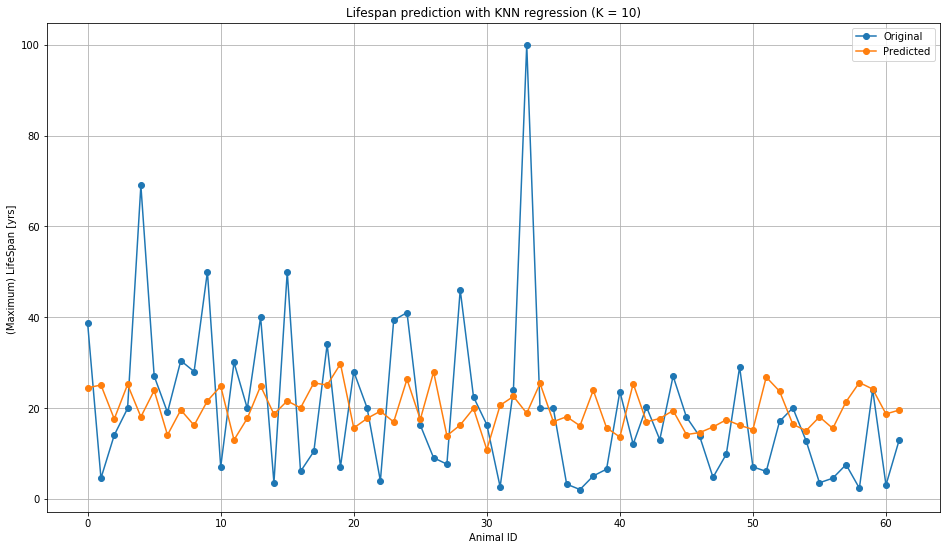

In [11]:
plt.figure(figsize=(16,9))
plt.plot(data.LifeSpan, 'o-', label ='Original')
plt.plot(predicted, 'o-', label = 'Predicted')
plt.xlabel('Animal ID')
plt.ylabel('(Maximum) LifeSpan [yrs] ')
plt.grid()
plt.title('Lifespan prediction with KNN regression (K = 10)')
plt.legend(loc = 'best');

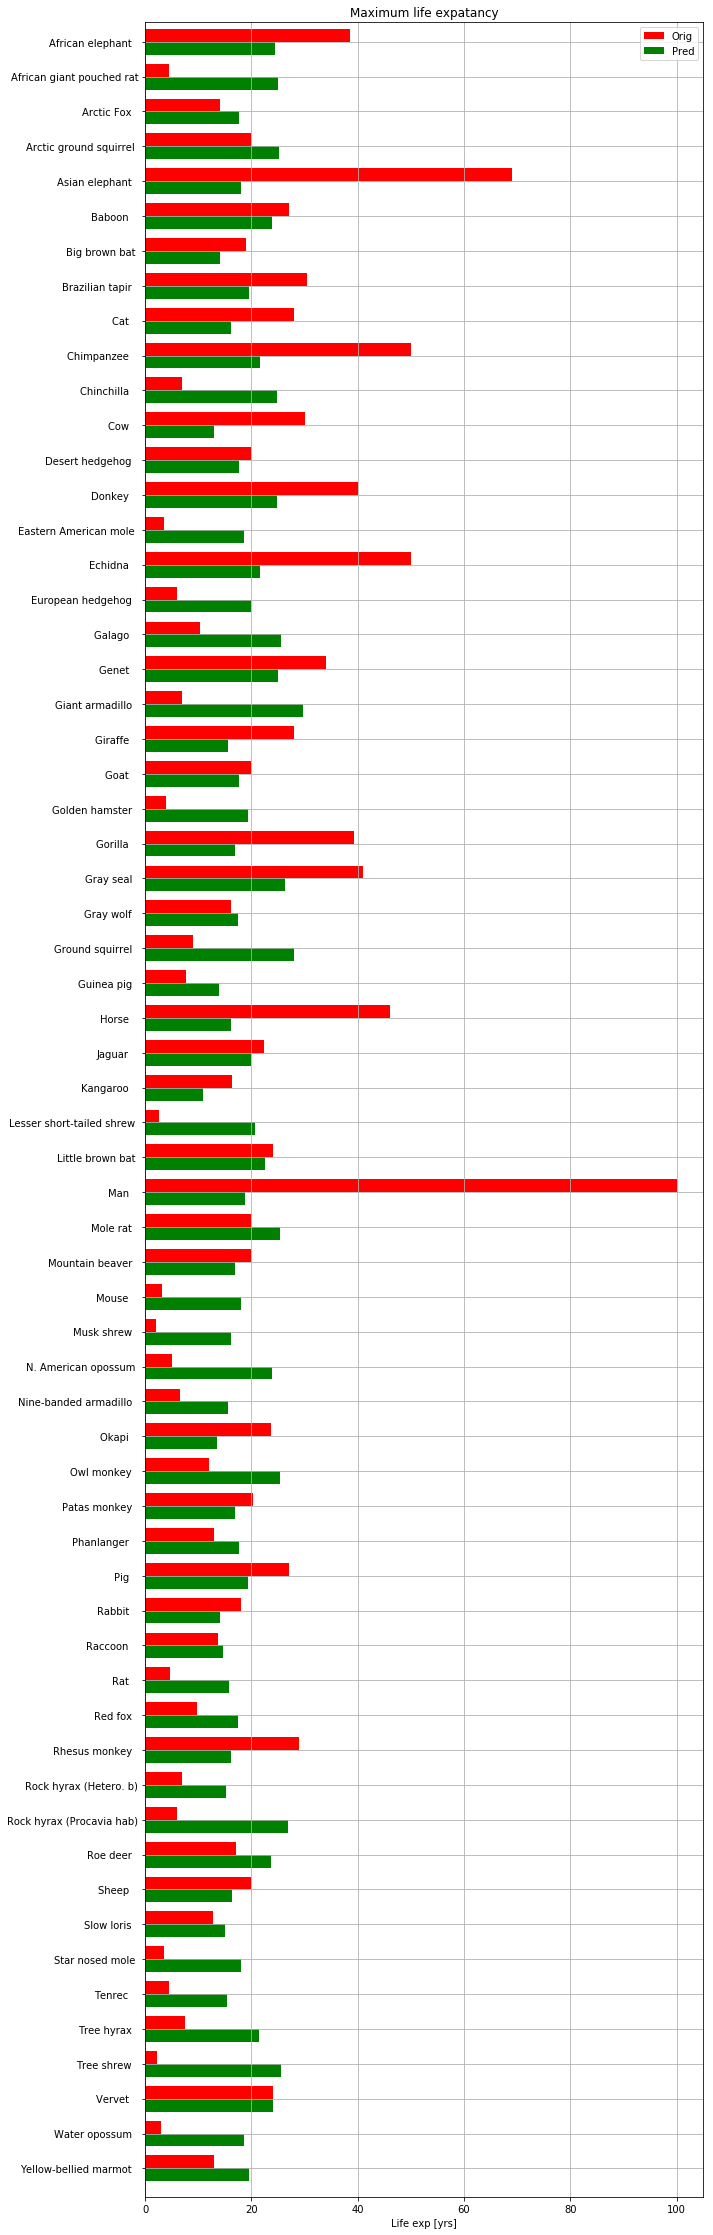

In [12]:
width = 0.37

fig, ax = plt.subplots(figsize=(10, 40))
ax.barh(data.index, data.LifeSpan, width, color='red', label='Orig', tick_label = data.Species)
ax.barh(data.index + width, predicted, width, color='green', label='Pred')
ax.grid()
ax.legend()
ylim([0-width,len(data.Species)])
xlabel('Life exp [yrs]')
yticks([i+width/2for i in data.index])
ax.invert_yaxis()
plt.title('Maximum life expatancy')
plt.show()

# A lot of csalás have been done:
# https://stackoverflow.com/questions/15201386/how-to-plot-multiple-horizontal-bars-in-one-chart-with-matplotlib
# https://stackoverflow.com/questions/34076177/matplotlib-horizontal-bar-chart-barh-is-upside-down

### C) Pearson corrcoef & MAE

In [13]:
print(f"The pearson corrcoef is {pearsonr(data.LifeSpan, predicted)[0]}. (From -1 to 1)\n"+
      f"The MAE is {mean_absolute_error(data.LifeSpan, predicted)}. (0 the best)")

The pearson corrcoef is -0.010497761789455386. (From -1 to 1)
The MAE is 13.056234705228029. (0 the best)


## 3) KNN w norm

### A) Normalizing and redoing 

In [14]:
data_norm = (data2.drop('LifeSpan', axis = 1) - data2.drop('LifeSpan', axis = 1).mean()) / data2.drop('LifeSpan', axis = 1).std()
data_norm['LifeSpan'] = data2.LifeSpan

In [15]:
data_norm.head()

,BodyW,BrainW,TS,GT,PI,SEI,ODI,RND,LifeSpan
0,7.179172,5.835740,-1.624186,3.542006,0.087396,1.608087,0.268584,0.798011,38.600000
1,-0.219972,-0.297259,-0.501388,-0.707162,0.087396,-0.884448,0.268584,0.873429,4.500000
2,-0.217320,-0.256519,0.441763,-0.580321,-1.267238,-0.884448,-1.119099,1.448105,14.000000
3,-0.220061,-0.298227,1.340002,-0.826956,1.442029,-0.261314,0.268584,1.047281,19.877586
4,2.611565,4.643624,-1.489450,3.394025,0.087396,1.608087,0.962425,0.317214,69.000000


In [16]:
# From documentation and
# https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
neigh = KNeighborsRegressor(n_neighbors=10,  p = 2)
# For easier handling
predicted_n = []

for index, row in data_norm.iterrows():
    data_temp = data_norm.drop(index, axis=0)
    neigh.fit(data_temp.drop('LifeSpan', axis = 1), data_temp.LifeSpan)
    predicted_n.append(neigh.predict([data_norm.drop('LifeSpan', axis = 1).loc[index].tolist()])[0])
    #print(predicted)


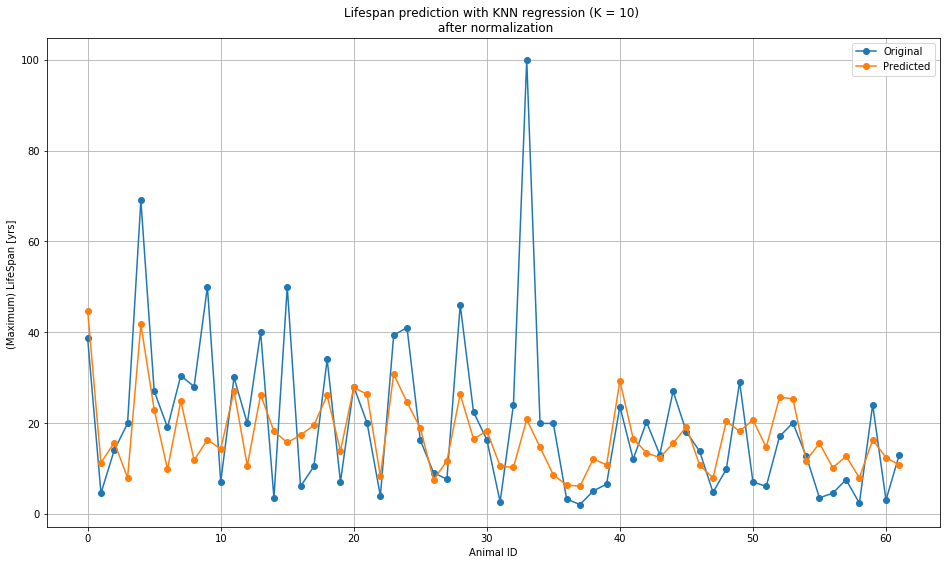

In [17]:
plt.figure(figsize=(16,9))
plt.plot(data_norm.LifeSpan, 'o-', label ='Original')
plt.plot(predicted_n, 'o-', label = 'Predicted')
plt.xlabel('Animal ID')
plt.ylabel('(Maximum) LifeSpan [yrs] ')
plt.grid()
plt.title('Lifespan prediction with KNN regression (K = 10) \n after normalization')
plt.legend(loc = 'best');

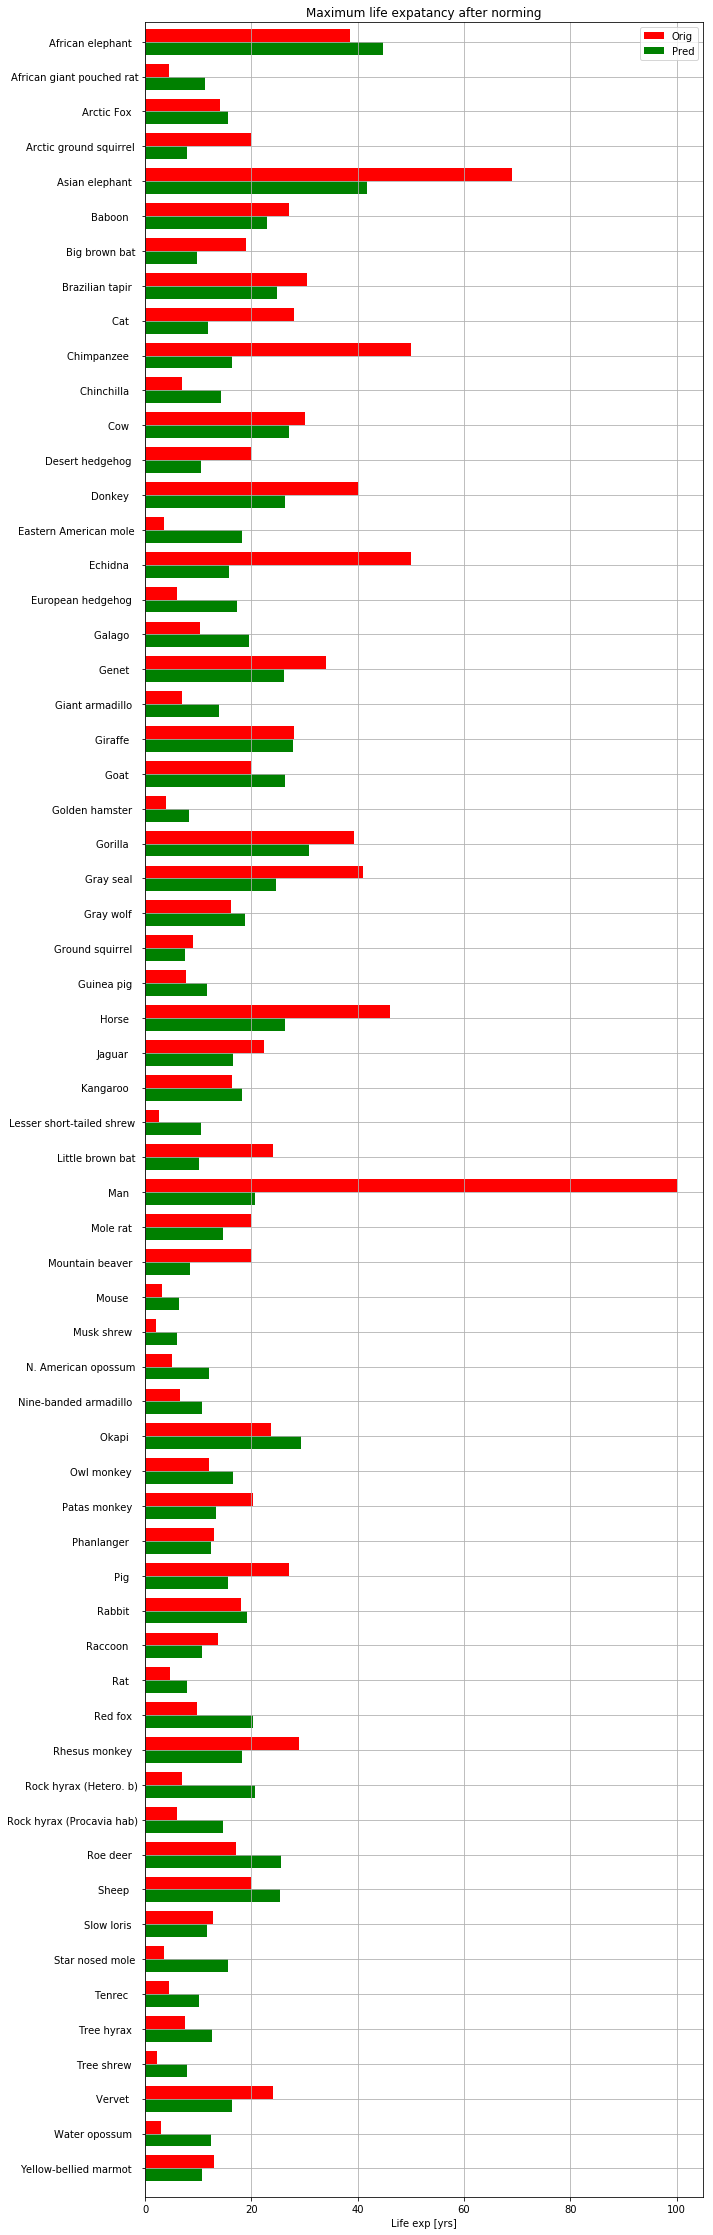

In [18]:
fig, ax = plt.subplots(figsize=(10, 40))
ax.barh(data_norm.index, data_norm.LifeSpan, width, color='red', label='Orig', tick_label = data.Species)
ax.barh(data_norm.index + width, predicted_n, width, color='green', label='Pred')
ax.grid()
ax.legend()
xlabel('Life exp [yrs]')
ylim([0-width,len(data.Species)])
yticks([i+width/2for i in data_norm.index])
ax.invert_yaxis()
plt.title('Maximum life expatancy after norming')
plt.show()


In [19]:
print(f"The pearson corrcoef is {pearsonr(data_norm.LifeSpan, predicted_n)[0]}. (From -1 to 1)\n"+
      f"The MAE is {mean_absolute_error(data_norm.LifeSpan, predicted_n)}. (0 the best)")

The pearson corrcoef is 0.573281490635197. (From -1 to 1)
The MAE is 9.524593993325919. (0 the best)


### B) & C) Explanations

The same goes here too. In such a multidimensional space, scaling the data is crucial, since not every dimension is taken with the same weight. A more varying dimension can mess up the whole picture, since here also, distances are being calculated.

Apart from the echdinas, a great part of the underestimated species are large animals. The reason can be their defensive skills. Proof: the inverse logic goes for the overestimated ones (e.g. Star nosed/eastern american mole, Rock/Tree hyrax, Opossum, Mouse, Hamster, ).

### D) MAE w diff K-s

In [20]:
def getthatMAE(data, k):
    neigh = KNeighborsRegressor(n_neighbors=k,  p = 2)
# For easier handling
    predicted = []

    for index, row in data.iterrows():
        data_temp = data.drop(index, axis=0)
        neigh.fit(data_temp.drop('LifeSpan', axis = 1), data_temp.LifeSpan)
        predicted.append(neigh.predict([data.drop('LifeSpan', axis = 1).loc[index].tolist()])[0])
        #print(predicted)
    
    return mean_absolute_error(data.LifeSpan, predicted)


In [21]:
K = [1, 5, 10, 15]

MAEs = [getthatMAE(data_norm, k) for k in K]

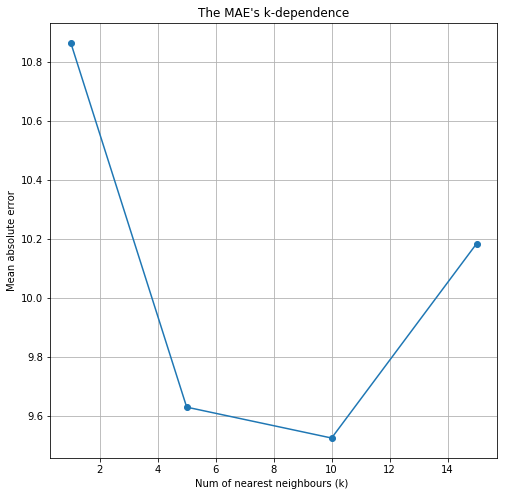

In [22]:
plt.figure(figsize=(8,8))
plt.plot(K, MAEs, 'o-')
plt.xlabel("Num of nearest neighbours (k) ")
plt.ylabel("Mean absolute error")
plt.title("The MAE\'s k-dependence")
plt.grid()
plt.show()

## 4) KNN "by hand"

### A) Creating model

Since I had the opportunity to look at the last year's solution, I felt free to use the code also.

In [23]:
# Of course, it's yours:
# https://nbviewer.jupyter.org/github/riblidezso/physdm/blob/master/examples/02_sup/02_sup_photoz_2018_example_solution.ipynb#1,-Write-KNN-regressor

def knn_regression(x2pred, x_train, y_train, k=10):
    """Return prediction with knn regression."""
    dist = [((x2pred-xi)**2).sum() for xi in x_train]
    knn = np.argsort(dist)[:k]
    return y_train[knn].mean()

# some machinating w the data

x2pred = data_norm.drop("LifeSpan", axis = 1).loc[33].values
x_train = data_norm.drop(33).drop("LifeSpan", axis = 1).values
y_train = data_norm.drop(33).LifeSpan.values

In [24]:
knn_regression(x2pred, x_train, y_train)

20.74551724137931

In [25]:
predicted_n[33]

20.74551724137931

### B) Conclusion

The results are the same.